In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [65]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
%matplotlib inline

## Question 1

Import the data set and print 10 random rows from the data set

In [66]:
colnames = ['sep_len', 'sep_width', 'pet_len', 'pet_width', 'class']
iris_df = pd.read_csv("iris.data", names= colnames)
iris_df.head(10)

,sep_len,sep_width,pet_len,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [67]:
iris_df.loc[ iris_df['sep_len'] == 0 | np.isnan(iris_df['sep_len']), 'sep_len' ] = iris_df['sep_len'].median()
iris_df.loc[ iris_df['sep_width'] == 0 | np.isnan(iris_df['sep_width']), 'sep_width' ] = iris_df['sep_width'].median()
iris_df.loc[ iris_df['pet_len'] == 0 | np.isnan(iris_df['pet_len']), 'pet_len' ] = iris_df['pet_len'].median()
iris_df.loc[ iris_df['pet_width'] == 0 | np.isnan(iris_df['pet_width']), 'pet_width' ] = iris_df['pet_width'].median()

In [68]:
iris_df.head(10)

,sep_len,sep_width,pet_len,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [70]:
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
iris_df['class'] = num.fit_transform(iris_df['class'].astype('str'))
iris_df.head(5)

,sep_len,sep_width,pet_len,pet_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [71]:
iris_df.corr()

,sep_len,sep_width,pet_len,pet_width,class
sep_len,1.000000,-0.109369,0.871754,0.817954,0.782561
sep_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
pet_len,0.871754,-0.420516,1.000000,0.962757,0.949043
pet_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [72]:
# All independednt variables show correlation beyond given range so accepting all variables.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [73]:
iris_df.var()

sep_len      0.685694
sep_width    0.188004
pet_len      3.113179
pet_width    0.582414
class        0.671141
dtype: float64

In [74]:
# All independednt variables have variance beyond given range so accepting all variables.

## Question 6

*Plot the scatter matrix for all the variables.*

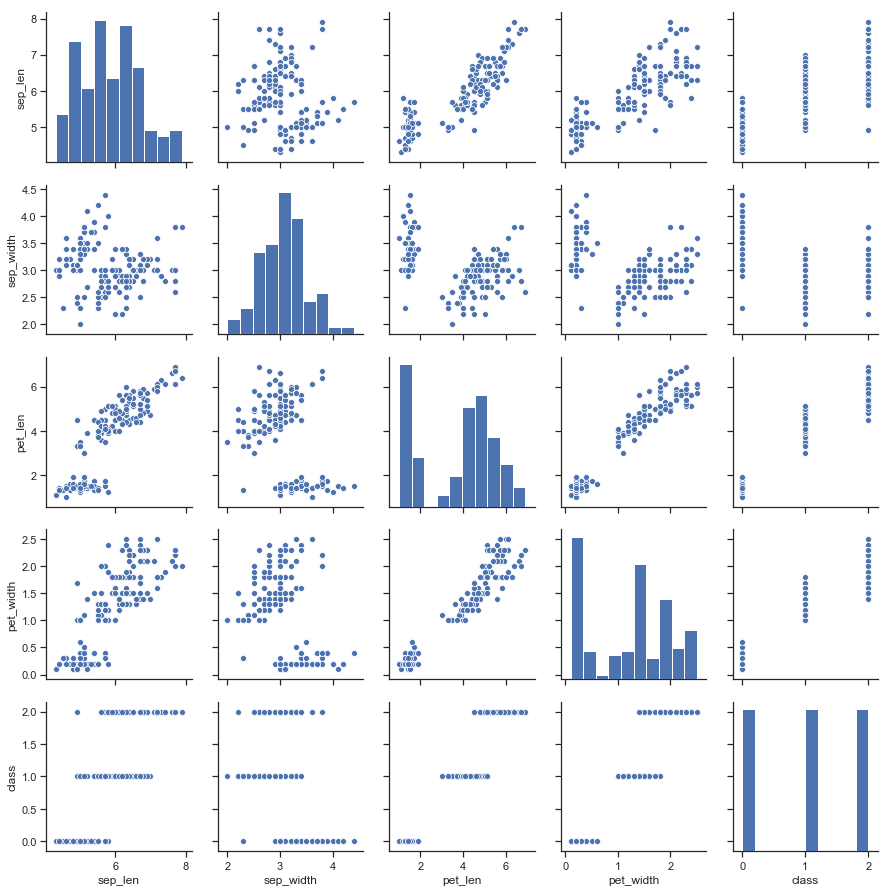

In [75]:
import seaborn as sns
sns.pairplot(iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [76]:
X = iris_df.drop("class", axis=1)
y = iris_df["class"]
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [77]:
model1 = KNeighborsClassifier(n_neighbors= 3)
model1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [78]:
ymodel1pred = model1.predict(X_test)
acc=metrics.accuracy_score(y_test,ymodel1pred)

In [79]:
model2 = KNeighborsClassifier(n_neighbors= 5)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
ymodel2pred = model1.predict(X_test)
acc1=metrics.accuracy_score(y_test,ymodel2pred)

In [81]:
model3 = KNeighborsClassifier(n_neighbors= 9)
model3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [82]:
ymodel3pred = model1.predict(X_test)
acc2=metrics.accuracy_score(y_test,ymodel3pred)

In [83]:
print ('With N_Neighbors as 3 model accuracy = ' , acc)
print ('With N_Neighbors as 5 model accuracy = ' , acc1)
print ('With N_Neighbors as 9 model accuracy = ' , acc2)

With N_Neighbors as 3 model accuracy =  0.9
With N_Neighbors as 5 model accuracy =  0.9
With N_Neighbors as 9 model accuracy =  0.9


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [84]:
df = pd.DataFrame(columns=['K','MSE'])
for i in range(1,20):
    Kmodel = KNeighborsClassifier(n_neighbors= i)
    Kmodel.fit(X_train,y_train)
    Kmodelpred = Kmodel.predict(X_test)
    Kacc=metrics.accuracy_score(y_test,Kmodelpred)
    Kmse = 1-Kacc
    df.loc[i] = i,Kmse

In [85]:
df.groupby(["MSE"]).min()

,K
MSE,
0.066667,2.0
0.100000,1.0
0.133333,6.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

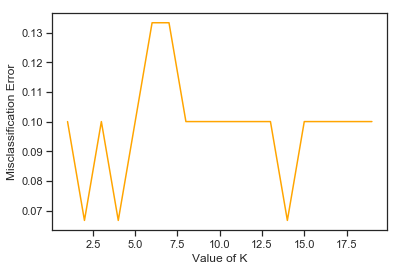

In [86]:
import matplotlib.pyplot as plt
plt.plot(df['K'],df['MSE'], color='orange')
plt.xlabel('Value of K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [87]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [88]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32
     sep_len  sep_width  pet_len  pet_width
0        5.1        3.5      1.4        0.2
1        4.9        3.0      1.4        0.2
2        4.7        3.2      1.3        0.2
3        4.6        3.1      1.5        0.2
4        5.0        3.6      1.4        0.2
5        5.4        3.9      1.7        0.4
6        4.6        3.4      1.4        0.3
7        5.0        3.4      1.5        0.2
8        4.4    

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


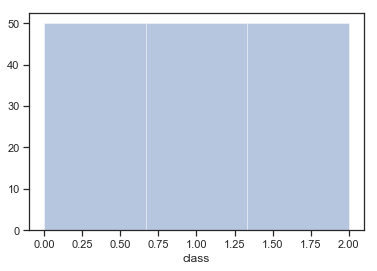

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt   
sns.distplot(iris_df['class'], kde=False)

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [90]:
iris_df.corr()

,sep_len,sep_width,pet_len,pet_width,class
sep_len,1.000000,-0.109369,0.871754,0.817954,0.782561
sep_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
pet_len,0.871754,-0.420516,1.000000,0.962757,0.949043
pet_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and test set in 80:20.

In [91]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [92]:
# Use StandardScaler or similar methods

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
ss = StandardScaler()
X_sc = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [96]:
X_sc.head(5)

,sep_len,sep_width,pet_len,pet_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Question 14 
Train and Fit NaiveBayes Model

In [97]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=test_size, random_state=seed)

In [123]:
#Fit the model
modelnb = GaussianNB()
modelnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
#Predict
predicted = modelnb.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [125]:
# show Confusion Matrix
metrics.confusion_matrix(predicted, y_test)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 3, 9]], dtype=int64)

In [126]:
# show accuracy
accuracy=metrics.accuracy_score(y_test,predicted)
print(accuracy)

0.8333333333333334


In [127]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [133]:
#Show precision and Recall metrics
print("Precision Score : ",metrics.precision_score(y_test, predicted,pos_label='positive',average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, predicted,pos_label='positive',average='micro'))

Precision Score :  0.8333333333333334
Recall Score :  0.8333333333333334


C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [134]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [135]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [136]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [137]:
# use from sklearn.svm import SVC

In [138]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [139]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [140]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [141]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [142]:
gs.fit(X_train_scaled, y_train) 

NameError: name 'gs' is not defined

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779